# Movie classification

The classification uses data available here:

https://raw.githubusercontent.com/danielgrijalva/movie-stats/master/movies.csv,

and is based on the course at Codecademy on K-Neighbors ML Algorithm. 

The aim of the classification is to predict if a film is a good one based on its parameters, such as its year of production, budget, runtime etc.

In the first part, all functions are written using basic library functions from numpy and math. 

Pandas is used for data importing and manipulatiton.

In the second part, functions from sklearn library are used for the classification.

# Functions used

In [59]:
import pandas as pd
import numpy as np
import math as m
from sklearn.model_selection import train_test_split

# Renormalization function
def min_max_normalization(x):
    '''
    renormalize values of x vector from [x_min, x_max] to [0, 1]
    '''
    x_min = min(x)
    x_max = max(x)
    return (x - x_min)/(x_max - x_min)

# Distance between two points
def euclidean_distance(p1, p2):
    '''
    calculate distance between two points
    '''
    return (np.sum((p1 - p2)**2))**0.5

# Classification function
def classify(unknown, data, labels, k):
    '''
    input:
    uknown - parameters of a film to be classified
    data - training film parameters
    labels - training film scores
    k - number of neighbors in K-Neighbors method
    
    return: predicted score of the film
    '''
    # Calculate distances from the film to other films
    distances = []
    for i in range(len(data)):
        dist = euclidean_distance(unknown, data[i])
        distances.append([labels[i], dist])
    
    # Choose only k nearest films
    distances.sort(key=lambda x: x[1])
    kneighbors = distances[:k]

    # Decide if the film is good
    class_unknown = 0
    for i in range(len(kneighbors)):
        class_unknown += kneighbors[i][0]
    class_unknown = class_unknown / k

    if class_unknown >= 0.5:
        return 1
    else:
        return 0

# Testing function
def testing_subset(xtest, xtrain, ytrain, k):
    '''
    input:
    xtest - parameters of tested films
    xtrain - parameterd of films in the model
    ytrain - labels of films in the model
    k - number of neighbors in K-Neighbors method

    return: predicted score of the films (ypredict)
    '''
    predict = []
    for j in range(len(xtest)):
        predict.append(classify(xtest[j], xtrain, ytrain, k))
    return np.array(predict)

# Accuracy
def accuracy(y_predict, ytest):
    return np.sum(y_predict == ytest)/len(y_predict)

# Precision
def precision(y_predict, ytest):
    predicted_positives = y_predict == 1
    true_positives = (ytest == 1) & predicted_positives
    return np.sum(true_positives) / np.sum(predicted_positives)

# Recall
def recall(y_predict, ytest):
    actual_positives = ytest == 1
    true_positives = (y_predict == 1) & actual_positives
    return np.sum(true_positives) / np.sum(actual_positives)

# F1 score
def f1(y_predict, ytest):
    r = recall(y_predict, ytest)
    p = precision(y_predict, ytest)
    return 2*p*r / (p + r) 

# Get rid of NaNs
def catch_NaN(v):
    indices_NaN = []
    for i in range(len(v)):
        if m.isnan(v[i]):
            indices_NaN.append(i)
    return np.array(indices_NaN)

# Import data

In [3]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/danielgrijalva/movie-stats/master/movies.csv')

# Show first 5 lines
print(df.head())

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nic

In [4]:
# Show column names
print(df.columns)
print('Number of records:', len(df))

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')
Number of records: 7668


In [5]:
# Put data to a data frame

year = df[['year']]
score = df[['score']]
votes = df[['votes']]
budget = df[['budget']]
gross = df[['gross']]
duration = df[['runtime']]

year = min_max_normalization(np.array(year).flatten())
votes = min_max_normalization(np.array(votes).flatten())
budget = min_max_normalization(np.array(budget).flatten())
gross = min_max_normalization(np.array(gross).flatten())
duration = min_max_normalization(np.array(duration).flatten())

score = np.array(score).flatten()

In [6]:
# Get rid of NaN

index_of_nan_votes = catch_NaN(votes)
index_of_nan_budget = catch_NaN(budget)
index_of_nan_gross = catch_NaN(gross)
index_of_nan_duration = catch_NaN(duration)
index_of_nan_score = catch_NaN(score)

all_indces = np.concatenate((index_of_nan_score, index_of_nan_votes, index_of_nan_budget, index_of_nan_gross, index_of_nan_duration))
all_indces = np.unique(all_indces)

print('Indices of NaN values:', all_indces)
print(len(all_indces), 'NaN values found in the dataset.')

# Remove rows with NaN values
year = np.delete(year, all_indces)
score = np.delete(score, all_indces)
votes = np.delete(votes, all_indces)
budget = np.delete(budget, all_indces)
gross = np.delete(gross, all_indces)
duration = np.delete(duration, all_indces)

Indices of NaN values: [  16   19   24 ... 7665 7666 7667]
2233 NaN values found in the dataset.


In [7]:
# Create new data frame with no NaNs
df = pd.DataFrame({
    'year': year,
    'score': score,
    'votes': votes,
    'budget': budget,
    'gross': gross,
    'runtime': duration
})

print(df.head())

   year  score     votes    budget     gross   runtime
0   0.0    8.4  0.386248  0.053363  0.016507  0.292605
1   0.0    5.8  0.027080  0.012632  0.020670  0.157556
2   0.0    8.7  0.499999  0.050554  0.189086  0.221865
3   0.0    7.7  0.092081  0.009823  0.029310  0.106109
4   0.0    7.3  0.044997  0.016846  0.013995  0.138264


# Split data

In [51]:
X = df[['year', 'votes', 'budget', 'gross', 'runtime']].values
y = df['score'].apply(lambda x: 1 if x >= 6 else 0).values

xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.8)

print('Train parameters:', np.shape(xtrain))
print('Train scores:', np.shape(ytrain))
print('Test parameters:', np.shape(xtest))
print('Test scores:', np.shape(ytest))

Train parameters: (4348, 5)
Train scores: (4348,)
Test parameters: (1087, 5)
Test scores: (1087,)


# Classification

In [56]:
y_predict = testing_subset(xtest, xtrain, ytrain, 5)

In [57]:
print('Accuracy:', '{:.2f}'.format(100*accuracy(y_predict, ytest)), '%')
print('Precision:', '{:.2f}'.format(100*precision(y_predict, ytest)), '%')
print('Recall:', '{:.2f}'.format(100*recall(y_predict, ytest)), '%')
print('F1 score:', '{:.2f}'.format(100*f1(y_predict, ytest)), '%')

Accuracy: 76.08 %
Precision: 80.39 %
Recall: 87.14 %
F1 score: 83.63 %


# Using library functions

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

fitter = KNeighborsClassifier(n_neighbors = 5)
fitter.fit(xtrain, ytrain)
y_predict_sklearn = fitter.predict(xtest)

print('Accuracy:', '{:.2f}'.format(100*accuracy_score(y_predict_sklearn, ytest)), '%')
print('Precision:', '{:.2f}'.format(100*precision_score(ytest, y_predict_sklearn, )), '%')
print('Recall:', '{:.2f}'.format(100*recall_score(ytest, y_predict_sklearn)), '%')
print('F1 score:', '{:.2f}'.format(100*f1_score(ytest, y_predict_sklearn)), '%')

Accuracy: 76.08 %
Precision: 80.39 %
Recall: 87.14 %
F1 score: 83.63 %


# ROC curve

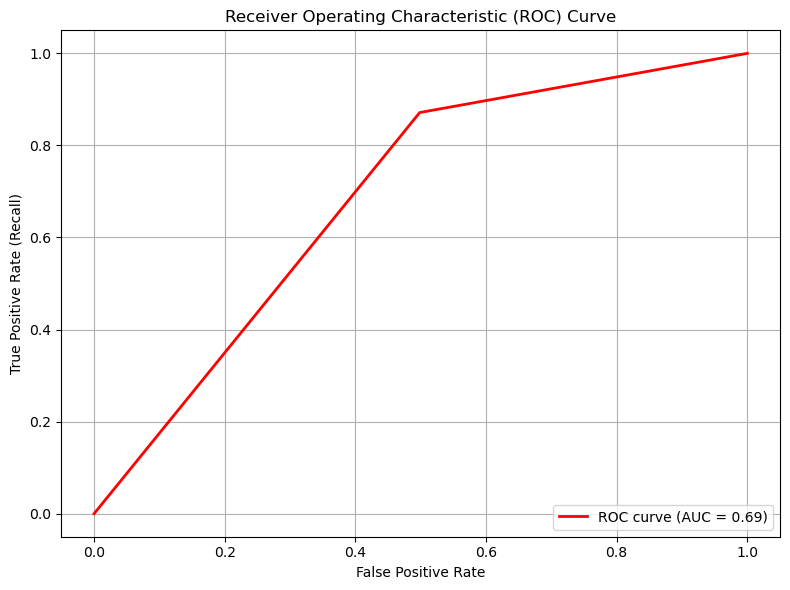

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_predict_sklearn)

# Compute AUC (area under curve)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="red", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()